# Dataload, Clean & Look at Distributions

---

Import the libraries required for this notebook to analyse and clean the data and visualise distributions

In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Import and check the data

Import the mental_health_social_media_dataset_raw.csv file in to a pandas dataframe:

In [2]:
# load raw dataset
df_raw = pd.read_csv("../data/mental_health_social_media_dataset_raw.csv")

View the first 10 rows of the file:

In [3]:
# display first 10 rows of the dataset
df_raw.head(10)

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed
5,Myra Kale,25,2/8/2024,Female,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed
6,Ananya Kulkarni,29,2/19/2024,Other,Snapchat,328,180,1,2,7.4,27,3,7,6,Stressed
7,Meera Das,28,1/11/2024,Female,Facebook,394,138,1,1,7.0,21,2,7,6,Stressed
8,Vihaan Naidu,31,1/22/2024,Male,Facebook,326,114,0,1,7.4,27,2,6,6,Stressed
9,Meera Patil,26,2/2/2024,Female,Facebook,339,119,0,1,7.3,26,2,6,6,Stressed


Check the shape of the dataframe:

In [4]:
df_raw.shape

(5000, 15)

There are 5000 rows of data and 15 columns.

Check summary of inital raw data:

In [5]:
before_summary = pd.DataFrame({
    "dtype": df_raw.dtypes,
    "missing_values": df_raw.isnull().sum(),
    "non_missing": df_raw.notnull().sum(),
    "unique_values": df_raw.nunique()
})
before_summary

,dtype,missing_values,non_missing,unique_values
person_name,object,0,5000,891
age,int64,0,5000,57
date,object,0,5000,686
gender,object,0,5000,3
platform,object,0,5000,7
daily_screen_time_min,int64,0,5000,342
social_media_time_min,int64,0,5000,304
negative_interactions_count,int64,0,5000,3
positive_interactions_count,int64,0,5000,5
sleep_hours,float64,0,5000,19


There are no missing values, so no need to handle any missing data and all the columns have lower snake case names so no need to rename any columns.

---

## Look at each column and assign data types

Go through each of the columns and set the data types, drop or add new columns if required.

First I will make a copy of the raw dataframe to make changes to:

In [6]:
df = df_raw.copy()

### Person name column

I am dropping the peron_name column. Although it is only a name, it is still personal data and is not required for the rest of the project. There are multiple rows with the same name that are clearly different people as they have different ages, so it is not like the same peron is being surveyed over time and with no person id number, there is no reports i can run to look at that sort of data trend.

In [7]:
# drop person_name column as it is not needed for analysis
df.drop("person_name", axis=1, inplace=True)

# display first 5 rows of cleaned dataset
df.head(5)

,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


### Date column

Set the datatype for the column to date (dates are in the american format of month / day / year currently)

In [8]:
# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

# Check data type of date column
df["date"].head()

0   2024-01-01
1   2024-01-12
2   2024-01-06
3   2024-01-17
4   2024-01-28
Name: date, dtype: datetime64[ns]

Add new columns for:
- year
- month
- week_number
- day_of_week
- month_name

In [9]:
# Extract date components for analysis
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week_number"] = df["date"].dt.isocalendar().week
df["day_of_week"] = df["date"].dt.day_name()
df["month_name"] = df["date"].dt.month_name()

Convert month names and weekday names to ordered categorical types

This is useful for creating bar charts and having the months and day of the week in logical order on the axis

In [10]:
# Define ordered categorical type for month names
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert month_name column to ordered categorical type
df["month_name"] = pd.Categorical(df["month_name"], 
                                  categories=month_order, 
                                  ordered=True)

# Define ordered categorical type for day of the week
weekday_order = [
    "Monday", "Tuesday", "Wednesday", "Thursday", 
    "Friday", "Saturday", "Sunday"
]

# Convert day_of_week column to ordered categorical type
df["day_of_week"] = pd.Categorical(df["day_of_week"], 
                                   categories=weekday_order, 
                                   ordered=True)

df.head()

,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state,year,month,week_number,day_of_week,month_name
0,35,2024-01-01,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed,2024,1,1,Monday,January
1,24,2024-01-12,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed,2024,1,2,Friday,January
2,26,2024-01-06,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed,2024,1,1,Saturday,January
3,66,2024-01-17,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed,2024,1,3,Wednesday,January
4,31,2024-01-28,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed,2024,1,4,Sunday,January


### Address categorical columns

Look at the gender column:

In [11]:
# display the unique gender values
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Set the gender column as a category column:

In [12]:
# Convert gender column to categorical type
df["gender"] = df["gender"].astype("category")

# Check data type
df["gender"].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False, categories_dtype=object)

Look at the platform column:

In [13]:
# display the unique platform values
df["platform"].unique()

array(['Instagram', 'Snapchat', 'Facebook', 'WhatsApp', 'TikTok',
       'YouTube', 'Twitter'], dtype=object)

Set the platform as a category column:

In [14]:
# Convert platform column to categorical type
df["platform"] = df["platform"].astype("category")

# Check data type
df["platform"].dtype

CategoricalDtype(categories=['Facebook', 'Instagram', 'Snapchat', 'TikTok', 'Twitter',
                  'WhatsApp', 'YouTube'],
, ordered=False, categories_dtype=object)

Look at the mental_state column:

In [15]:
# display the unique mental_state values
df["mental_state"].unique()

array(['Stressed', 'Healthy', 'At_Risk'], dtype=object)

Set mental_state as an ordered category Healthy < Stressed < At_Risk

(I am making an assumption that the At_Risk is meaning the patient is at risk. There is a possability of it meaning the patient is at rik of being stressed but it isn't defined in the dataset documentation. I tried doing a grouped_by query and looking at the mean of the other values for each mental state but that didn't shed any light on which way round it should be considered)

I will also change the "At_Risk" to be "At Risk" for asthetic reasons

In [16]:
# Change "At_Risk" to be "At Risk"
df["mental_state"] = df["mental_state"].replace({
    "At_Risk": "At Risk",
})

# Define ordered categorical type for mental_state
mental_order = ["Healthy", "Stressed", "At Risk"]

# Convert mental_state column to ordered categorical type
df["mental_state"] = pd.Categorical(
    df["mental_state"],
    categories=mental_order,
    ordered=True
)

# Check data type
df["mental_state"].dtype

CategoricalDtype(categories=['Healthy', 'Stressed', 'At Risk'], ordered=True, categories_dtype=object)

### Add Age Groups

I am adding an age group column to allow for better descriptive charts

The age groups I am using are:
- <18
- 18-24
- 25-34
- 35-44
- 45-54
- 55+

In [19]:
# Create age group definitions and labels
bins = [0, 17, 24, 34, 44, 54, 120]
labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55+"]

# Create age_group categorical column
df['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels,
)

# Check data type
df['age_group'].dtype

CategoricalDtype(categories=['<18', '18-24', '25-34', '35-44', '45-54', '55+'], ordered=True, categories_dtype=object)

### Add new interaction columns

There are 2 columns for positive and negative interaction count. I am adding 2 new columns:

- `interaction_total` - Which is the total number of interactions, no matter if positive or negative
- `interaction_negative_ratio` - Which gives the ratio of which interactions were negative

In [21]:
# Add interactive total column
df["interaction_total"] = (
    df["negative_interactions_count"] + df["positive_interactions_count"]
)

# Add interactive negative ratio column
df["interaction_negative_ratio"] = (
    df["negative_interactions_count"] / df["interaction_total"]
)

# Fill NaN values with 0 for any cases where the was a division by zero
df["interaction_negative_ratio"] = df["interaction_negative_ratio"].fillna(0)

# Display first 5 rows of the new columns
df[["interaction_total", "interaction_negative_ratio"]].head()

,interaction_total,interaction_negative_ratio
0,3,0.333333
1,4,0.250000
2,3,0.333333
3,1,0.000000
4,3,0.333333


### Look at other numerical columns

In [ ]:
# Display summary statistics for the other numerical columns (transposed for readability)
df.describe(include=["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,29.94780,12.279936,13.0,21.0,27.000000,35.25,69.0
daily_screen_time_min,5000.0,373.05820,106.003916,140.0,310.0,388.000000,461.00,520.0
social_media_time_min,5000.0,175.33160,71.209329,35.0,118.0,170.000000,231.00,338.0
negative_interactions_count,5000.0,0.86420,0.555176,0.0,1.0,1.000000,1.00,2.0
positive_interactions_count,5000.0,1.83540,0.943443,0.0,1.0,2.000000,2.00,4.0
sleep_hours,5000.0,7.13466,0.533184,6.4,6.7,7.100000,7.45,8.3
physical_activity_min,5000.0,22.69340,10.602862,8.0,14.0,21.000000,29.00,46.0
anxiety_level,5000.0,2.51040,0.794996,1.0,2.0,3.000000,3.00,4.0
stress_level,5000.0,7.10760,1.062378,5.0,6.0,7.000000,8.00,9.0
mood_level,5000.0,5.62580,0.759928,4.0,5.0,6.000000,6.00,7.0


I have decided to leave the 3 level fields as numerical field for now, rather than convert to categorical fields to allow for easy correlation reporting in the next section.

---

## Data Distributions

This section is to look at the data distributions.

### Numerical fields - Histograms and KDE

Create a function to use Freedman–Diaconis rule to calculate the number of bins:

This is useful as it adapts to the data spread and is robust against outliers


In [52]:
def calculate_bins(df, col):
    '''
    Calculate the number of bins for a histogram using the Freedman-Diaconis rule.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - col: String name of the column to calculate the number of bins for.

    Returns:
    - Integer number of bins.
    '''

    # Calculate interquartile range
    q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q75 - q25

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * iqr * (len(df[col]) ** (-1/3))

    # Calculate number of bins by dividing the range by the bin width
    return int((df[col].max() - df[col].min()) / bin_width)

Create function for creating a single histogram/kde chart:

In [ ]:
def plot_histogram_kde(axes, df, col, title, bins, kde=True):
    '''
    Plots a histogram with KDE overlay for a specified column in the dataframe.
    Plots vertical lines for mean and one standard deviation above and below the mean.

    Parameters:
    - axes: Matplotlib Axes object where the plot will be drawn.
    - df: Pandas DataFrame containing the data.
    - col: String name of the column to plot.
    - title: String title for the plot.
    - bins: Integer number of bins for the histogram or list of bin edges.
    - kde: Boolean indicating whether to plot the KDE overlay (default is True).
    Returns:
    - None
    '''

    # Plot histogram with KDE
    sns.histplot(data=df, x=col, kde=kde, bins=bins, color="skyblue", ax=axes)

    # Set plot title and labels
    axes.set_title(title)
    axes.set_xlabel(col.replace("_", " ").title())
    axes.set_ylabel("Frequency")
    
    # Plot vertical line for mean
    axes.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

    # Plot vertical line for one standard deviation above the mean
    axes.axvline(df[col].mean() + df[col].std(), color='g', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='g')
    
    # Plot vertical line for one standard deviation below the mean
    axes.axvline(df[col].mean() - df[col].std(), color='g', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='-1σ', fontsize=15, c='g')

Create the 3x2 chart:

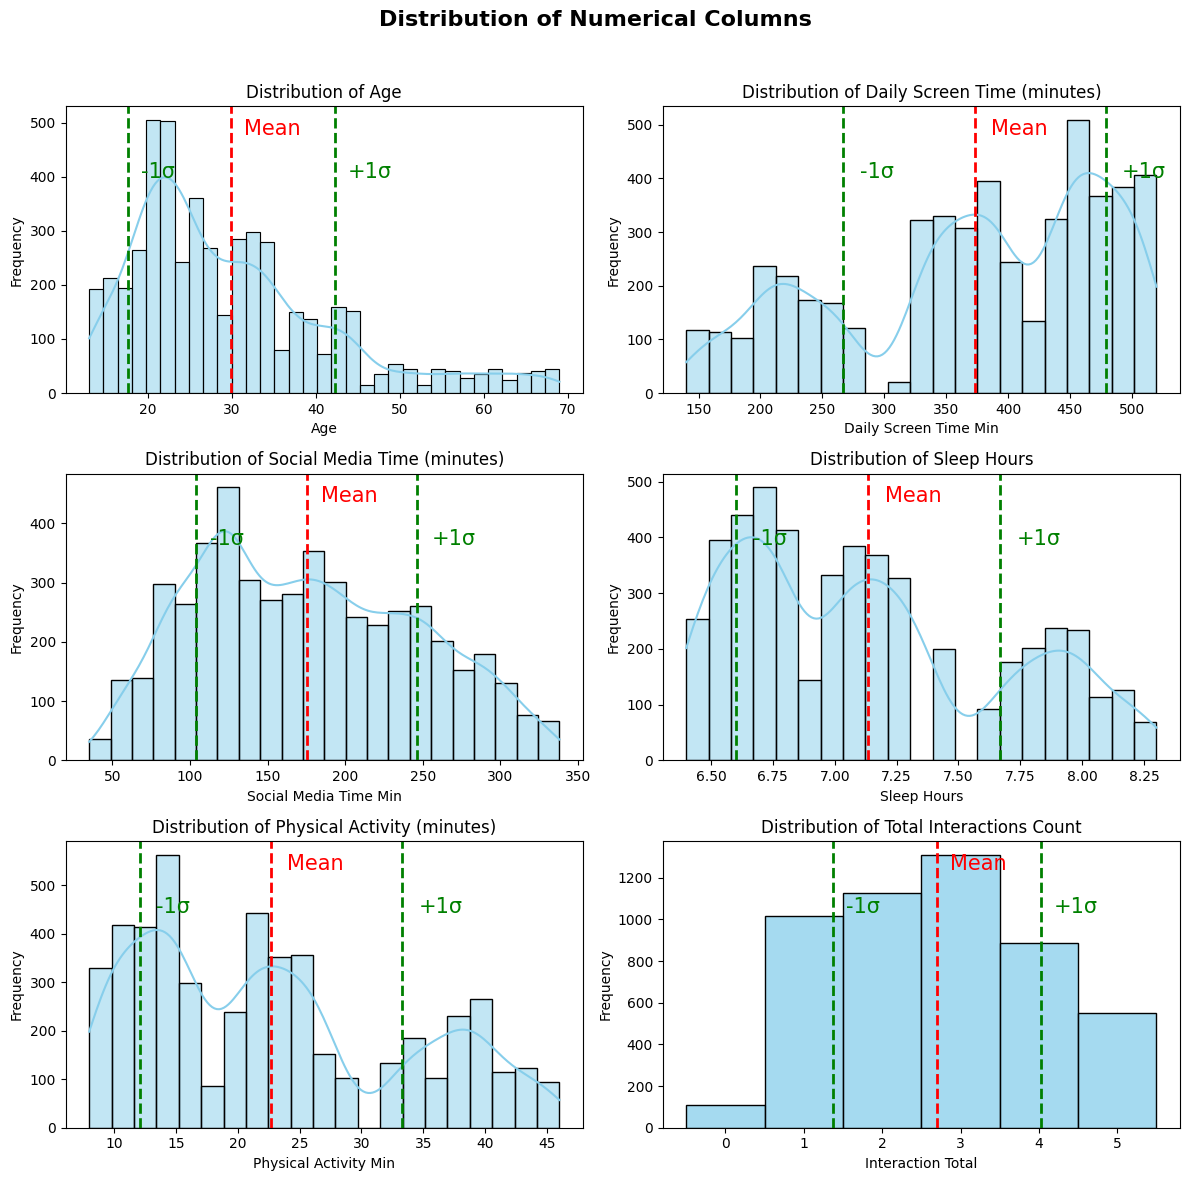

In [ ]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Add histogram plots for row 1 and row 2
plot_histogram_kde(axs[0, 0], df, 'age', 'Distribution of Age', calculate_bins(df, 'age'))
plot_histogram_kde(axs[0, 1], df, 'daily_screen_time_min', 'Distribution of Daily Screen Time (minutes)', calculate_bins(df, 'daily_screen_time_min'))
plot_histogram_kde(axs[1, 0], df, 'social_media_time_min', 'Distribution of Social Media Time (minutes)', calculate_bins(df, 'social_media_time_min'))
plot_histogram_kde(axs[1, 1], df, 'sleep_hours', 'Distribution of Sleep Hours', calculate_bins(df, 'sleep_hours'))
plot_histogram_kde(axs[2, 0], df, 'physical_activity_min', 'Distribution of Physical Activity (minutes)', calculate_bins(df, 'physical_activity_min'))
plot_histogram_kde(axs[2, 1], df, 'interaction_total', 'Distribution of Total Interactions Count', [-0.5,0.5,1.5,2.5,3.5,4.5,5.5], kde=False)

# Add overall title
fig.suptitle('Distribution of Numerical Columns', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/distribution_of_numerical_columns_histogram.png')
plt.show()

View the exported png [here](../charts/distribution_of_numerical_columns_histogram.png)

The first 5 charts above are all showing a multi-modal distribution which suggests there are sub-groups or patterns in the data which might help when I get to the clustering section later in this project.

The 6th chart for total interactions, I left it as a histogram, fixed the bin widths and removed the KDE as it was meaningless as it isn't continuos data. It gives an indication as to how many interactions an average user has.